In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados_tempo = pd.read_excel('(1.2) dataset_principal.xls')
dados_merge = pd.read_excel('(1.3) dataset_join.xls')

In [4]:
pd.set_option("display.max.columns", None)

print(dados_tempo)

     Estudante  Tempo para chegar à escola (minutos)  \
0     Gabriela                                    15   
1       Dalila                                    20   
2      Gustavo                                    20   
3      Letícia                                    40   
4  Luiz Ovídio                                    50   
5       Leonor                                    25   
6          Ana                                    10   
7      Antônio                                    55   
8        Júlia                                    35   
9      Mariana                                    30   

   Distância percorrida até a escola (quilômetros)  Quantidade de semáforos  \
0                                                8                        0   
1                                                6                        1   
2                                               15                        0   
3                                               20                 

In [5]:
dados_tempo.columns

Index(['Estudante', 'Tempo para chegar à escola (minutos)',
       'Distância percorrida até a escola (quilômetros)',
       'Quantidade de semáforos', 'Período do dia', 'Perfil ao volante'],
      dtype='object')

In [6]:
dados_tempo.head(n=5)

,Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
0,Gabriela,15,8,0,Manhã,calmo
1,Dalila,20,6,1,Manhã,moderado
2,Gustavo,20,15,0,Manhã,moderado
3,Letícia,40,20,1,Tarde,agressivo
4,Luiz Ovídio,50,25,2,Tarde,agressivo


In [7]:
dados_tempo.tail(n=3)

,Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
7,Antônio,55,32,3,Tarde,calmo
8,Júlia,35,28,1,Manhã,moderado
9,Mariana,30,20,1,Manhã,moderado


In [8]:
dados_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Estudante                                        10 non-null     object
 1   Tempo para chegar à escola (minutos)             10 non-null     int64 
 2   Distância percorrida até a escola (quilômetros)  10 non-null     int64 
 3   Quantidade de semáforos                          10 non-null     int64 
 4   Período do dia                                   10 non-null     object
 5   Perfil ao volante                                10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [9]:
dados_tempo = dados_tempo.rename(columns={'Estudante':'estudante',
                                          'Tempo para chegar à escola (minutos)':'tempo',
                                          'Distância percorrida até a escola (quilômetros)': 'distancia',
                                          'Quantidade de semáforos': 'semaforos',
                                          'Período do dia': 'periodo',
                                          'Perfil ao volante': 'perfil'})

In [10]:
dados_novo = dados_tempo.rename(columns={dados_tempo.columns[0]: 'obs',
                                         dados_tempo.columns[1]: 'temp',
                                         dados_tempo.columns[5]: 'perf'})

In [11]:
dados_novo.rename(columns={'distancia': 'dist',
                           'semaforos': 'sem',
                           'periodo': 'per'},
                  inplace=True)

In [12]:
dados_tempo.iloc[3,]
dados_tempo.iloc[:,4] # argumento : indicam vazio na linha
dados_tempo.iloc[2:5,] # note que exclui a posição final
dados_tempo.iloc[:,3:5] # note que exclui a posição final
dados_tempo.iloc[2:4,3:5] # note que exclui as posições finais
dados_tempo.iloc[5,4]

'Manhã'

In [13]:
dados_tempo['tempo']
var_tempo = dados_tempo['tempo']

dados_tempo.perfil
var_perfil = dados_tempo.perfil

In [14]:
dados_tempo[['tempo', 'perfil']]
var_tempo_perfil = dados_tempo[['tempo', 'perfil']]

In [15]:
selec_1 = dados_tempo.loc[:, dados_tempo.columns.str.startswith('per')]

In [16]:
selec_2 = dados_tempo.loc[:, dados_tempo.columns.str.endswith('o')]

In [17]:
idade = pd.Series([25,28,30,19,20,36,33,48,19,21])
dados_novo['idade'] = idade

In [18]:
nova_obs = pd.DataFrame({'per': ['Tarde'],
                         'obs': ['Roberto'],
                         'temp': [40]})

dados_concat = pd.concat([dados_novo, nova_obs])
dados_concat = pd.concat([dados_novo, nova_obs]).reset_index(drop=True)


In [19]:
dados_novo['sem_km'] = round((dados_novo['sem'] / dados_novo ['dist']), 2)

In [20]:
labels = {'calmo': 'perfil_A',
          'moderado': 'perfil_B',
          'agressivo': 'perfil_C'}

df_labels = dados_tempo.assign(novo_perfil = dados_tempo.perfil.map(labels))
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   estudante    10 non-null     object
 1   tempo        10 non-null     int64 
 2   distancia    10 non-null     int64 
 3   semaforos    10 non-null     int64 
 4   periodo      10 non-null     object
 5   perfil       10 non-null     object
 6   novo_perfil  10 non-null     object
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [21]:
numeros = {'calmo': 1,
           'moderado': 2,
           'agressivo': 3}

df_numeros = dados_tempo.assign(novo_perfil = dados_tempo.perfil.map(numeros))
df_numeros.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   estudante    10 non-null     object
 1   tempo        10 non-null     int64 
 2   distancia    10 non-null     int64 
 3   semaforos    10 non-null     int64 
 4   periodo      10 non-null     object
 5   perfil       10 non-null     object
 6   novo_perfil  10 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [22]:
textos = {0: 'zero',
          1: 'um',
          2: 'dois',
          3: 'três'}

df_texto = dados_tempo.assign(novo_semaforos = dados_tempo.semaforos.map(textos))
df_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   estudante       10 non-null     object
 1   tempo           10 non-null     int64 
 2   distancia       10 non-null     int64 
 3   semaforos       10 non-null     int64 
 4   periodo         10 non-null     object
 5   perfil          10 non-null     object
 6   novo_semaforos  10 non-null     object
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [23]:
dados_tempo['faixa'] = np.where(dados_tempo['tempo']<=20, 'rápido',
                       np.where((dados_tempo['tempo']>20) & (dados_tempo['tempo']<=40), 'médio',
                       np.where(dados_tempo['tempo']>40, 'demorado',
                                'demais')))

In [24]:
dados_tempo['quartis'] = pd.qcut(dados_tempo['tempo'], q=4, labels=['1','2','3','4'])

In [25]:
df_numeros['novo_perfil'] = df_numeros['novo_perfil'].astype('category')
df_numeros.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   estudante    10 non-null     object  
 1   tempo        10 non-null     int64   
 2   distancia    10 non-null     int64   
 3   semaforos    10 non-null     int64   
 4   periodo      10 non-null     object  
 5   perfil       10 non-null     object  
 6   novo_perfil  10 non-null     category
dtypes: category(1), int64(3), object(3)
memory usage: 754.0+ bytes


In [26]:
df_numeros.drop(columns=['periodo', 'perfil'], inplace=True)

In [27]:
df_org_1 = dados_tempo.sort_values(by=['tempo'], ascending=True).reset_index(drop=True)

In [28]:
df_org_2 = dados_tempo.sort_values(by=['tempo'], ascending=False).reset_index(drop=True)

In [29]:
df_org_3 = dados_tempo.sort_values(by=['estudante'], ascending=True).reset_index(drop=True)
df_org_4 = dados_tempo.sort_values(by=['perfil'], ascending=False).reset_index(drop=True)

In [30]:
df_org_5 = dados_tempo.sort_values(by=['perfil', 'distancia'], 
                                   ascending=[False, True]).reset_index(drop=True)

In [31]:
dados_tempo.describe()

,tempo,distancia,semaforos
count,10.00000,10.000000,10.000000
mean,30.00000,17.000000,1.000000
std,14.90712,9.510228,0.942809
min,10.00000,5.000000,0.000000
25%,20.00000,8.750000,0.250000
50%,27.50000,17.500000,1.000000
75%,38.75000,23.750000,1.000000
max,55.00000,32.000000,3.000000


In [32]:
dados_tempo['tempo'].count() # contagem
dados_tempo['tempo'].mean() # média
dados_tempo['tempo'].median() # mediana
dados_tempo['tempo'].min() # mínimo
dados_tempo['tempo'].max() # máximo
dados_tempo['tempo'].std() # desvio padrão
dados_tempo['tempo'].var() # variância
dados_tempo['tempo'].quantile([0.25, 0.75]) # quartis
dados_tempo['tempo'].sum() # soma

np.int64(300)

In [33]:
dados_tempo[['tempo', 'distancia', 'semaforos']].corr()

,tempo,distancia,semaforos
tempo,1.000000,0.905221,0.909155
distancia,0.905221,1.000000,0.755914
semaforos,0.909155,0.755914,1.000000


In [34]:
dados_tempo['periodo'].value_counts() # frequências absolutas
dados_tempo['perfil'].value_counts(normalize=True) # frequências relativas

perfil
moderado     0.5
calmo        0.3
agressivo    0.2
Name: proportion, dtype: float64

In [35]:
pd.crosstab(dados_tempo['periodo'], dados_tempo['perfil'])
pd.crosstab(dados_tempo['periodo'], dados_tempo['perfil'], normalize=True)


perfil,agressivo,calmo,moderado
periodo,,,
Manhã,0.0,0.2,0.5
Tarde,0.2,0.1,0.0


In [36]:
dados_tempo['tempo'].unique()
dados_tempo['periodo'].unique()
dados_tempo['perfil'].nunique()

3

In [37]:
dados_periodo = dados_tempo.groupby(['periodo'])

In [38]:
dados_periodo.describe()

tempo                                                    distancia  \
        count       mean       std   min   25%   50%   75%   max     count   
periodo                                                                      
Manhã     7.0  22.142857  8.591247  10.0  17.5  20.0  27.5  35.0       7.0   
Tarde     3.0  48.333333  7.637626  40.0  45.0  50.0  52.5  55.0       3.0   

                                                           semaforos  \
              mean       std   min   25%   50%   75%   max     count   
periodo                                                                
Manhã    13.285714  8.360907   5.0   7.0  11.0  17.5  28.0       7.0   
Tarde    25.666667  6.027714  20.0  22.5  25.0  28.5  32.0       3.0   

                                                      
             mean       std  min  25%  50%  75%  max  
periodo                                               
Manhã    0.571429  0.534522  0.0  0.0  1.0  1.0  1.0  
Tarde    2.000000  1.000000  1.0  1.5  2.0  2.5  3.0

In [39]:
dados_periodo.describe().T

periodo              Manhã      Tarde
tempo     count   7.000000   3.000000
          mean   22.142857  48.333333
          std     8.591247   7.637626
          min    10.000000  40.000000
          25%    17.500000  45.000000
          50%    20.000000  50.000000
          75%    27.500000  52.500000
          max    35.000000  55.000000
distancia count   7.000000   3.000000
          mean   13.285714  25.666667
          std     8.360907   6.027714
          min     5.000000  20.000000
          25%     7.000000  22.500000
          50%    11.000000  25.000000
          75%    17.500000  28.500000
          max    28.000000  32.000000
semaforos count   7.000000   3.000000
          mean    0.571429   2.000000
          std     0.534522   1.000000
          min     0.000000   1.000000
          25%     0.000000   1.500000
          50%     1.000000   2.000000
          75%     1.000000   2.500000
          max     1.000000   3.000000

In [40]:
dados_periodo.size()

periodo
Manhã    7
Tarde    3
dtype: int64

In [41]:
dados_criterios = dados_tempo.groupby(['periodo', 'perfil'])

In [42]:
dados_criterios.describe().T

periodo              Manhã                 Tarde      
perfil               calmo   moderado  agressivo calmo
tempo     count   2.000000   5.000000   2.000000   1.0
          mean   12.500000  26.000000  45.000000  55.0
          std     3.535534   6.519202   7.071068   NaN
          min    10.000000  20.000000  40.000000  55.0
          25%    11.250000  20.000000  42.500000  55.0
          50%    12.500000  25.000000  45.000000  55.0
          75%    13.750000  30.000000  47.500000  55.0
          max    15.000000  35.000000  50.000000  55.0
distancia count   2.000000   5.000000   2.000000   1.0
          mean    6.500000  16.000000  22.500000  32.0
          std     2.121320   8.455767   3.535534   NaN
          min     5.000000   6.000000  20.000000  32.0
          25%     5.750000  11.000000  21.250000  32.0
          50%     6.500000  15.000000  22.500000  32.0
          75%     7.250000  20.000000  23.750000  32.0
          max     8.000000  28.000000  25.000000  32.0
semaforos count   2.000000   5.000000   2.000000   1.0
          mean    0.000000   0.800000   1.500000   3.0
          std     0.000000   0.447214   0.707107   NaN
          min     0.000000   0.000000   1.000000   3.0
          25%     0.000000   1.000000   1.250000   3.0
          50%     0.000000   1.000000   1.500000   3.0
          75%     0.000000   1.000000   1.750000   3.0
          max     0.000000   1.000000   2.000000   3.0

In [43]:
dados_criterios.size()

periodo  perfil   
Manhã    calmo        2
         moderado     5
Tarde    agressivo    2
         calmo        1
dtype: int64

In [44]:
dados_periodo.agg({'tempo': 'mean',
                   'distancia': 'mean',
                   'periodo': 'count'})

,tempo,distancia,periodo
periodo,,,
Manhã,22.142857,13.285714,7
Tarde,48.333333,25.666667,3


In [45]:
filtro_calmo = dados_tempo[dados_tempo['perfil'] == 'calmo']
filtro_quartil = dados_tempo[dados_tempo['quartis'] == '1']

dados_tempo.query('perfil == "calmo"')
dados_tempo.query('quartis == "1"')


,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
6,Ana,10,5,0,Manhã,calmo,rápido,1


In [46]:
filtro_intersecao = dados_tempo[(dados_tempo['perfil'] == 'calmo') & (dados_tempo['periodo'] == 'Tarde')]

dados_tempo.query('perfil == "calmo" & periodo == "Tarde"')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
7,Antônio,55,32,3,Tarde,calmo,demorado,4


In [47]:
filtro_uniao = dados_tempo[(dados_tempo['perfil'] == 'calmo') | (dados_tempo['periodo'] == 'Tarde')]

dados_tempo.query('perfil == "calmo" | periodo == "Tarde"')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
6,Ana,10,5,0,Manhã,calmo,rápido,1
7,Antônio,55,32,3,Tarde,calmo,demorado,4


In [48]:
filtro_difer = dados_tempo[(dados_tempo['perfil'] != 'calmo')]

dados_tempo.query('perfil != "calmo"')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [49]:

filtro_tempo_1 = dados_tempo[dados_tempo['tempo'] >= 25]

filtro_tempo_2 = dados_tempo[(dados_tempo['tempo'] > 30) & (dados_tempo['distancia'] <= 25)]

filtro_tempo_3 = dados_tempo[dados_tempo['tempo'].between(25, 40, inclusive='both')]

In [ ]:
dados_tempo.query('tempo >= 25')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
7,Antônio,55,32,3,Tarde,calmo,demorado,4
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [52]:
dados_tempo.query('tempo > 30 & distancia <= 25')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4


In [53]:
dados_tempo.query('tempo.between(25, 40, inclusive="both")')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
3,Letícia,40,20,1,Tarde,agressivo,médio,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [54]:
nomes = pd.Series(["Gabriela", "Gustavo", "Leonor", "Ana", "Júlia"])
filtro_contidos = dados_tempo[dados_tempo['estudante'].isin(nomes)]

In [55]:
dados_tempo.query('estudante.isin(@nomes)')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
5,Leonor,25,11,1,Manhã,moderado,médio,2
6,Ana,10,5,0,Manhã,calmo,rápido,1
8,Júlia,35,28,1,Manhã,moderado,médio,3


In [56]:
filtro_tempo_4 = dados_tempo[~(dados_tempo['tempo'] >= 25)]

filtro_perfil_demais = dados_tempo[~(dados_tempo['perfil'] == 'moderado')]

filtro_nao_contidos = dados_tempo[~(dados_tempo['estudante'].isin(nomes))]

In [57]:
dados_tempo.query('~(tempo >= 25)')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
6,Ana,10,5,0,Manhã,calmo,rápido,1


In [58]:
dados_tempo.query('~(perfil == "moderado")')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
6,Ana,10,5,0,Manhã,calmo,rápido,1
7,Antônio,55,32,3,Tarde,calmo,demorado,4


In [59]:
dados_tempo.query('~(estudante.isin(@nomes))')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
1,Dalila,20,6,1,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
7,Antônio,55,32,3,Tarde,calmo,demorado,4
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [60]:
dados_merge.rename(columns={'Estudante':'estudante'}, inplace=True)

In [61]:
merge_1 = pd.merge(dados_tempo, dados_merge, on='estudante', how='left')

In [62]:
merge_2 = pd.merge(dados_tempo, dados_merge, on='estudante', how='right')

In [63]:
merge_3 = pd.merge(dados_tempo, dados_merge, on='estudante', how='outer')

In [64]:
merge_4 = pd.merge(dados_tempo, dados_merge, on='estudante', how='inner')

In [65]:
dados_tempo.drop_duplicates()

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
6,Ana,10,5,0,Manhã,calmo,rápido,1
7,Antônio,55,32,3,Tarde,calmo,demorado,4
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [66]:
len(dados_tempo) - len(dados_tempo.drop_duplicates()) 

0

In [67]:
dados_tempo.drop_duplicates(subset=['estudante', 'perfil'])

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis
0,Gabriela,15,8,0,Manhã,calmo,rápido,1
1,Dalila,20,6,1,Manhã,moderado,rápido,1
2,Gustavo,20,15,0,Manhã,moderado,rápido,1
3,Letícia,40,20,1,Tarde,agressivo,médio,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,demorado,4
5,Leonor,25,11,1,Manhã,moderado,médio,2
6,Ana,10,5,0,Manhã,calmo,rápido,1
7,Antônio,55,32,3,Tarde,calmo,demorado,4
8,Júlia,35,28,1,Manhã,moderado,médio,3
9,Mariana,30,20,1,Manhã,moderado,médio,3


In [68]:
merge_3.isna().sum()

estudante        0
tempo            1
distancia        1
semaforos        1
periodo          1
perfil           1
faixa            1
quartis          1
Região_Cidade    1
dtype: int64

In [69]:
merge_3 = merge_3.assign(quartis = merge_3.quartis.astype('object'))

In [70]:
merge_3.fillna('elemento')

,estudante,tempo,distancia,semaforos,periodo,perfil,faixa,quartis,Região_Cidade
0,Ana,10.0,5.0,0.0,Manhã,calmo,rápido,1,Região_A
1,Antônio,55.0,32.0,3.0,Tarde,calmo,demorado,4,elemento
2,Dalila,20.0,6.0,1.0,Manhã,moderado,rápido,1,Região_B
3,Gabriela,15.0,8.0,0.0,Manhã,calmo,rápido,1,Região_A
4,Gustavo,20.0,15.0,0.0,Manhã,moderado,rápido,1,Região_B
5,Júlia,35.0,28.0,1.0,Manhã,moderado,médio,3,Região_C
6,Leonor,25.0,11.0,1.0,Manhã,moderado,médio,2,Região_B
7,Letícia,40.0,20.0,1.0,Tarde,agressivo,médio,4,Região_C
8,Luiz Ovídio,50.0,25.0,2.0,Tarde,agressivo,demorado,4,Região_D
9,Marcos,elemento,elemento,elemento,elemento,elemento,elemento,elemento,Região_D


In [71]:
merge_3['tempo'].fillna(merge_3['tempo'].mean())

0     10.0
1     55.0
2     20.0
3     15.0
4     20.0
5     35.0
6     25.0
7     40.0
8     50.0
9     30.0
10    30.0
Name: tempo, dtype: float64

In [72]:
df_estrutura = pd.melt(dados_tempo,
                       id_vars='estudante',
                       value_vars=['tempo', 'distancia'])

<Axes: xlabel='value', ylabel='estudante'>

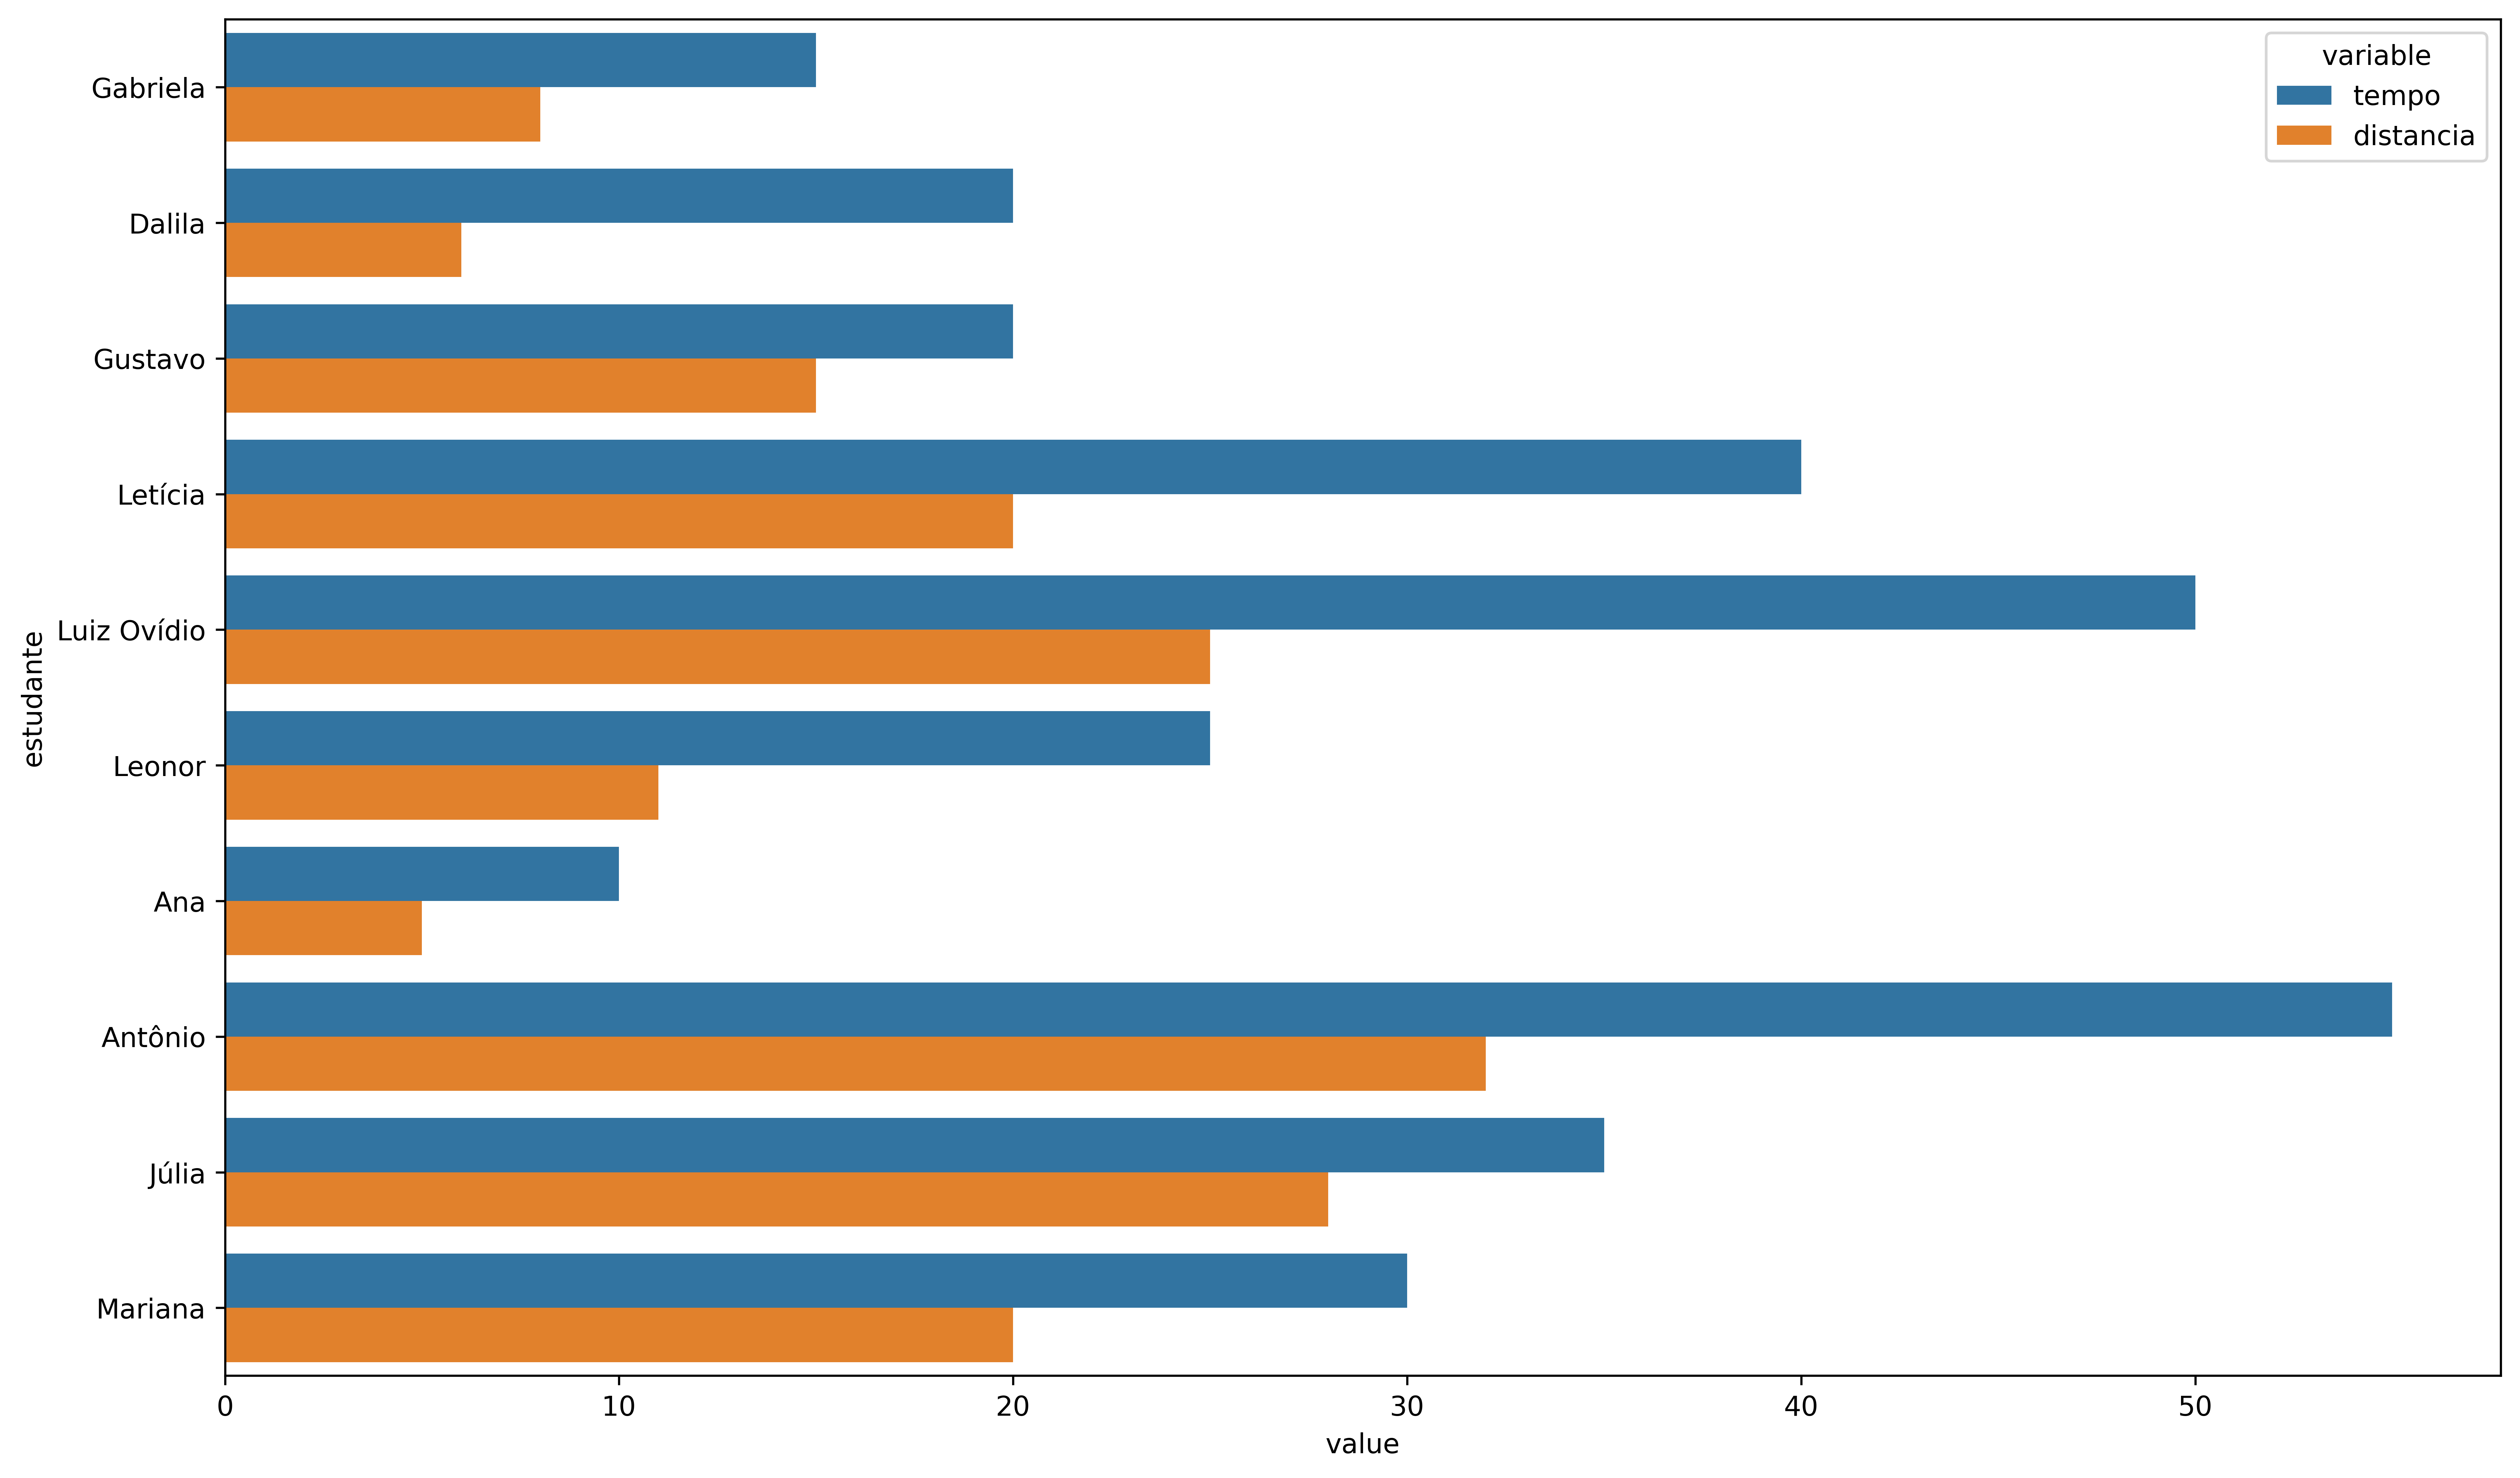

In [73]:
plt.figure(figsize=(15,9), dpi = 600)
sns.barplot(data=df_estrutura, y='estudante', x='value', hue='variable')

In [74]:
(dados_tempo
.assign(sem_km = round((dados_novo['sem']/dados_novo ['dist']), 2))
.query('tempo >= 30')
.rename(columns={'periodo':'per'})
.groupby('per')
.agg({'sem_km':'mean',
      'distancia': 'mean',
      'per': 'count'}))

,sem_km,distancia,per
per,,,
Manhã,0.045000,24.000000,2
Tarde,0.073333,25.666667,3


In [75]:
df_ajustes = (dados_tempo
.assign(sem_km = round((dados_novo['sem']/dados_novo ['dist']), 2))
.query('tempo >= 30')
.rename(columns={'periodo':'per'})).sort_values('estudante').reset_index(drop=True)